In [1]:
import os
import random
import pandas as pd
import numpy as np
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

/tmp/ipykernel_1213/3164994817.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
x = np.linspace(0,10)

In [3]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)

In [4]:
set_seeds()

In [6]:
y = x + np.random.standard_normal(len(x))

In [8]:
reg = np.polyfit(x,y,deg=1)
reg

array([0.94612934, 0.22855261])

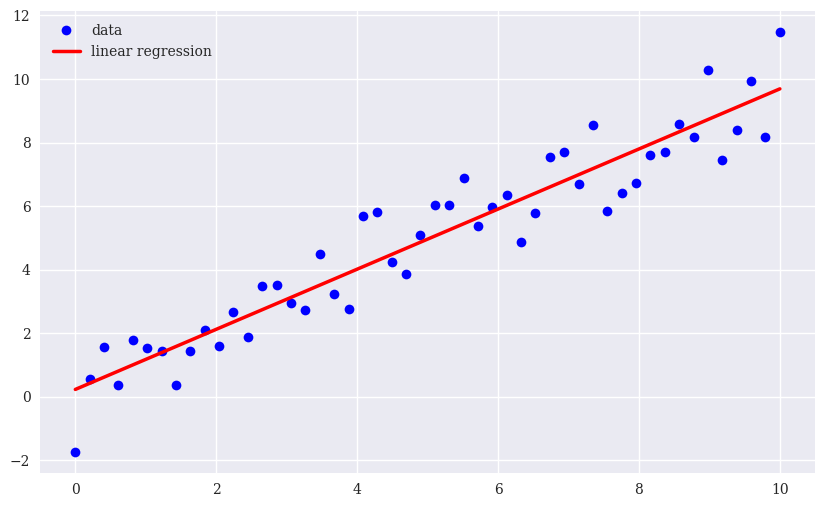

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'bo',label='data')
plt.plot(x,np.polyval(reg,x), 'r',lw=2.5,label='linear regression')
plt.legend(loc=0)

In [11]:
x = np.arange(12)

In [12]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [13]:
lags = 3

In [14]:
m = np.zeros((lags + 1, len(x) - lags))

In [2]:
raw = pd.read_csv('raw.csv',index_col=0)

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5+ KB


In [4]:
symbol = 'EUR='
data = pd.DataFrame(raw[symbol])
data.rename(columns={symbol: 'price'},inplace=True)

In [5]:
lags=5

In [6]:
cols=[]
for lag in range(1,lags+1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag)
    cols.append(col)

data.dropna(inplace=True)

In [7]:
reg = np.linalg.lstsq(data[cols],data['price'],rcond=None)[0]

In [8]:
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [9]:
data['prediction'] = np.dot(data[cols],reg)

<AxesSubplot: xlabel='Date'>

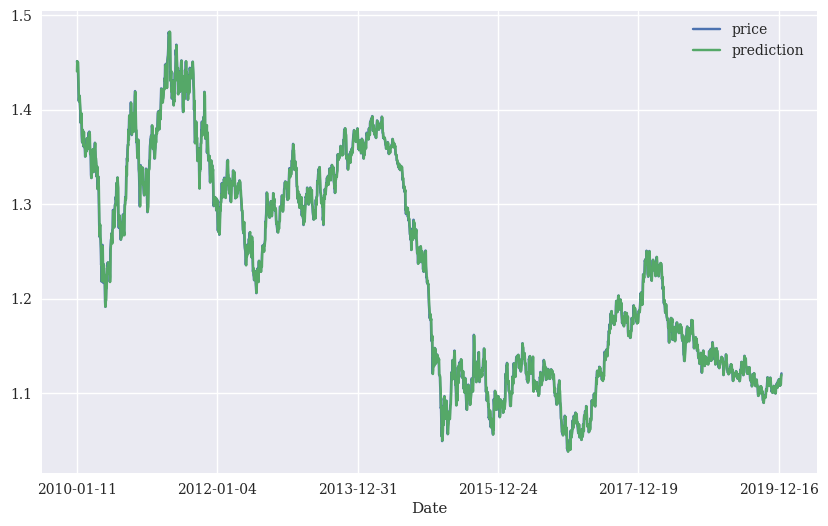

In [10]:
data[['price','prediction']].plot(figsize=(10,6))

<AxesSubplot: xlabel='Date'>

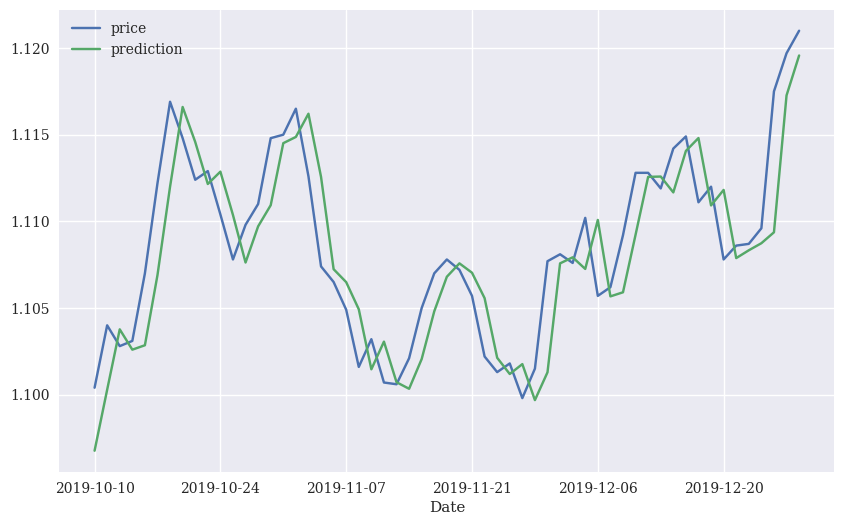

In [11]:
data[['price','prediction']].loc['2019-10-1':].plot(figsize=(10,6))

In [12]:
data['return'] = np.log(data['price']/data['price'].shift(1))

In [13]:
data.dropna(inplace=True)

In [15]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)

data.dropna(inplace=True)

In [ ]:
reg = np.linalg.lstsq(data[cols],data['return'])